In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:

#===============================================================
# Leer los datos del archivo .dat

# Datos con phi=psi=1.0 grados, psidot=0.0
data1 = np.loadtxt('espacio_fasico1.dat', delimiter=',')
data3 = np.loadtxt('espacio_fasico3.dat', delimiter=',')
data5 = np.loadtxt('espacio_fasico5.dat', delimiter=',')
data10 = np.loadtxt('espacio_fasico10.dat', delimiter=',')
data15 = np.loadtxt('espacio_fasico15.dat', delimiter=',')

# Datos con phi=psi=1.5 grados, psidot=0.1
data1p = np.loadtxt('espacio_fasico1_prime.dat', delimiter=',')
data3p = np.loadtxt('espacio_fasico3_prime.dat', delimiter=',')
data5p = np.loadtxt('espacio_fasico5_prime.dat', delimiter=',')
data10p = np.loadtxt('espacio_fasico10_prime.dat', delimiter=',')
data15p = np.loadtxt('espacio_fasico15_prime.dat', delimiter=',')


# Datos originales
original_data = np.array([data1, data3, data5, data10, data15])

# Datos perturbados
perturbed_data = np.array([data1p, data3p, data5p, data10p, data15p])

# Acceder a cada conjunto de datos específico
phi_original = original_data[:, :, 0]
psi_original = original_data[:, :, 1]
phidot_original = original_data[:, :, 2]
psidot_original = original_data[:, :, 3]

phi_perturbed = perturbed_data[:, :, 0]
psi_perturbed = perturbed_data[:, :, 1]
phidot_perturbed = perturbed_data[:, :, 2]
psidot_perturbed = perturbed_data[:, :, 3]




In [4]:
## CALCULOS
m = 10**7

# Calculo diferencias
deltaphi = np.abs(phi_original-phi_perturbed)
deltapsi = np.abs(psi_original-psi_perturbed)
deltaphidot = np.abs(phidot_original-phidot_perturbed)
deltapsidot = np.abs(psidot_original-psidot_perturbed)

delta = np.sqrt(deltaphi**2 + deltapsi**2 + deltaphidot**2 + deltapsidot**2)



# Calculo coeficientes
l = np.zeros(5)
for i in range(len(l)):
    l[i] = 1/m * sum(np.log(delta[i,:]/delta[i,0]))
print(l)

lphi = np.zeros(5)
for i in range(len(lphi)):
    lphi[i] = 1/m * sum(np.log(deltaphi[i,:]/deltaphi[i,0]))
print("El valor para phi es :",lphi)

lpsi = np.zeros(5)
for i in range(len(l)):
    lpsi[i] = 1/m * sum(np.log(deltapsi[i,:]/deltapsi[i,0]))
print("El valor para psi es : ",lpsi)

lphidot = np.zeros(5)
for i in range(len(lphidot)):
    lphidot[i] = 1/m * sum(np.log(deltaphidot[i,:]/deltaphidot[i,0]))
print("El valor para phidot es : " ,lphidot)

lpsidot = np.zeros(5)
for i in range(len(lpsidot)):
    lpsidot[i] = 1/m * sum(np.log(deltapsidot[i,:]/deltapsidot[i,0]))
print("El valor para psidot es : " ,lpsidot)

[6.12630987 9.63601393 9.13793589 9.57456501 9.02194648]


C:\Users\Jose\AppData\Local\Temp\ipykernel_19244\359508456.py:22: RuntimeWarning: divide by zero encountered in log
  lphi[i] = 1/m * sum(np.log(deltaphi[i,:]/deltaphi[i,0]))


El valor para phi es : [       -inf 10.10717345  9.01327974  8.81791979  8.62245724]
El valor para psi es :  [ 6.90266427  9.9346311   9.76039296 10.21146392  9.64103847]


C:\Users\Jose\AppData\Local\Temp\ipykernel_19244\359508456.py:32: RuntimeWarning: divide by zero encountered in log
  lphidot[i] = 1/m * sum(np.log(deltaphidot[i,:]/deltaphidot[i,0]))


El valor para phidot es :  [-inf -inf -inf -inf -inf]


C:\Users\Jose\AppData\Local\Temp\ipykernel_19244\359508456.py:37: RuntimeWarning: divide by zero encountered in log
  lpsidot[i] = 1/m * sum(np.log(deltapsidot[i,:]/deltapsidot[i,0]))


El valor para psidot es :  [-inf -inf -inf -inf -inf]


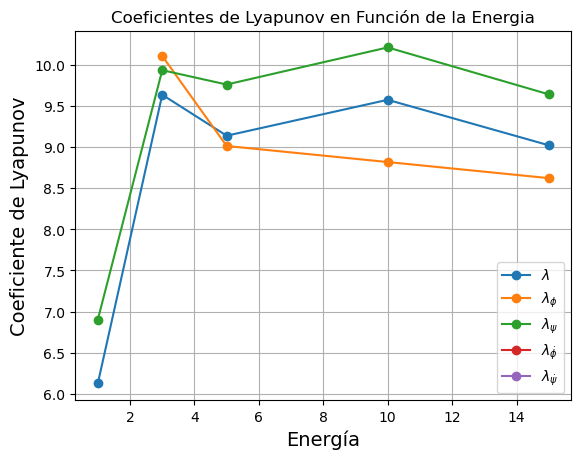

In [14]:
## Graficas
E = [1, 3, 5, 10 ,15]
plt.figure()
plt.title("Coeficientes de Lyapunov en Función de la Energia")
plt.plot(E, l, marker='o', linestyle='-',label=r"$\lambda$")
plt.plot(E, lphi, marker='o', linestyle='-',label=r"$\lambda_{\phi}$")
plt.plot(E, lpsi, marker='o', linestyle='-',label=r"$\lambda_{\psi}$")
plt.plot(E, lphidot, marker='o', linestyle='-',label=r"$\lambda_{\dot{\phi}}$")
plt.plot(E, lpsidot, marker='o', linestyle='-',label=r"$\lambda_{\dot{\psi}}$")
plt.ylabel(r'Coeficiente de Lyapunov', fontsize=14)
plt.xlabel(r'Energía', fontsize=14)
plt.grid()
plt.legend()

